In [27]:
import pandas as pd
filename = "Dataset_SmatWatcher2.csv"
df = pd.read_csv("datasets/" + filename)
df.columns

Index(['_id', 'metadata.speed', 'metadata.bateria', 'metadata.numSV',
       'metadata.dateUtcIso', 'metadata.accH', 'metadata.hMSL', 'metadata.lng',
       'metadata.lat'],
      dtype='object')

In [28]:
df['date'] = pd.to_datetime(df['metadata.dateUtcIso']) 
df.set_index(['date'])
df['date'].min(),df['date'].max()

(Timestamp('2020-12-30 00:00:01+0000', tz='UTC'),
 Timestamp('2021-01-14 21:39:34+0000', tz='UTC'))

In [29]:
numdays = (df['date'].max()-df['date'].min()).days
numdays
numhours = numdays*24
numhours += (df['date'].max()-df['date'].min()).seconds//3600
dates = list(pd.date_range(df['date'].min(), periods=numhours+1, freq='H'))
csvspage = ""
for i in range(len(dates)-1):
    mask = (df['date']>=dates[i]) & (df['date']<dates[i+1])
    segment = df.loc[mask]
    if len(segment) > 0:
        date = str(dates[i].date())
        hour = dates[i].hour
        filename = date + ":" + str(hour) + ".csv"
        link = "<a href='"+filename+"'>"+filename+" ("+str(len(segment))+")</a><br>\n"
        print(link, end='')
        csvspage += link
        # segment.drop(columns=['date']).to_csv("static/" + filename, index=False)
with open("static/csvspage.html", "w") as text_file:
    print(csvspage, file=text_file)

<a href='2020-12-30:0.csv'>2020-12-30:0.csv (2639)</a><br>
<a href='2020-12-30:1.csv'>2020-12-30:1.csv (2706)</a><br>
<a href='2020-12-30:2.csv'>2020-12-30:2.csv (2694)</a><br>
<a href='2020-12-30:3.csv'>2020-12-30:3.csv (2694)</a><br>
<a href='2020-12-30:4.csv'>2020-12-30:4.csv (1166)</a><br>
<a href='2020-12-30:5.csv'>2020-12-30:5.csv (2596)</a><br>
<a href='2020-12-30:6.csv'>2020-12-30:6.csv (2661)</a><br>
<a href='2020-12-30:7.csv'>2020-12-30:7.csv (1173)</a><br>
<a href='2020-12-30:8.csv'>2020-12-30:8.csv (15)</a><br>
<a href='2020-12-30:9.csv'>2020-12-30:9.csv (1669)</a><br>
<a href='2020-12-30:10.csv'>2020-12-30:10.csv (2586)</a><br>
<a href='2020-12-30:11.csv'>2020-12-30:11.csv (2675)</a><br>
<a href='2020-12-30:12.csv'>2020-12-30:12.csv (2580)</a><br>
<a href='2020-12-30:13.csv'>2020-12-30:13.csv (2596)</a><br>
<a href='2020-12-30:14.csv'>2020-12-30:14.csv (1759)</a><br>
<a href='2020-12-30:15.csv'>2020-12-30:15.csv (2330)</a><br>
<a href='2020-12-30:16.csv'>2020-12-30:16.csv 

In [30]:
df = pd.read_csv("static/" + filename)

In [31]:
import numpy as np

lnglat = df[['metadata.lng','metadata.lat']] #.sample(n=10000)

# latlng.plot.scatter(x='metadata.lng',y='metadata.lat', alpha=0.01)

X = lnglat.to_numpy()

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(100)
y_pred = kmeans.fit_predict(X)
# kmeans.cluster_centers_

In [33]:
unique, count = np.unique(y_pred, return_counts=True)
distribution = counts/sum(counts)
# distribution

<AxesSubplot:xlabel='lng', ylabel='lat'>

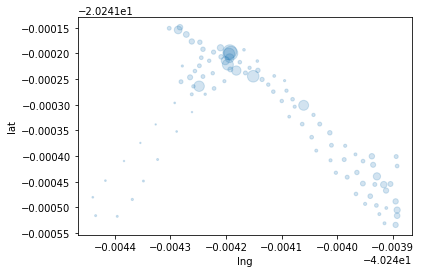

In [34]:
df = pd.DataFrame(kmeans.cluster_centers_, columns=['lng','lat'])
df['count'] = count
df.plot(kind="scatter", x="lng", y="lat", s="count", alpha=0.2)

In [35]:
df.to_json(orient='records')

'[{"lng":-40.2441949482,"lat":-20.2412010525,"count":139},{"lng":-40.2439163333,"lat":-20.2414556619,"count":42},{"lng":-40.2440604051,"lat":-20.2413010889,"count":99},{"lng":-40.2442560154,"lat":-20.2412343231,"count":13},{"lng":-40.2442714676,"lat":-20.24116305,"count":34},{"lng":-40.2443686,"lat":-20.2414845,"count":5},{"lng":-40.2441511133,"lat":-20.241244483,"count":135},{"lng":-40.24398574,"lat":-20.24137994,"count":10},{"lng":-40.2438950214,"lat":-20.2415341,"count":28},{"lng":-40.2441967339,"lat":-20.2412218017,"count":121},{"lng":-40.2442375333,"lat":-20.24127945,"count":6},{"lng":-40.2438922949,"lat":-20.2415051308,"count":39},{"lng":-40.2439354923,"lat":-20.2414169962,"count":26},{"lng":-40.2440460429,"lat":-20.2413632643,"count":14},{"lng":-40.2439663154,"lat":-20.2414737692,"count":13},{"lng":-40.24432655,"lat":-20.24133835,"count":2},{"lng":-40.2440024818,"lat":-20.2414324364,"count":11},{"lng":-40.2440913,"lat":-20.2412725182,"count":11},{"lng":-40.2442224222,"lat":-20.2